In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
from SDMBench import *
from scipy.stats import *

In [2]:
pd_df_all = pd.read_feather('performance_summary.feather')

In [3]:
pd_df_all[pd_df_all['DataID']=='Dataset9']

,index,DataName,DataID,Biotech,BiotechType,Replicate,Method,NMI,HOM,COM,CHAOS,PAS,ASW,MoranI,GearyC,time,memory
1529,90,151673,Dataset9,Visium,Sequencing,0,SpaGCN_with,0.477589,0.493094,0.463029,0.06667,0.243146,-0.010941,0.465782,0.533136,88.799474,2254.447495
1530,91,151673,Dataset9,Visium,Sequencing,1,SpaGCN_with,0.477589,0.493094,0.463029,0.06667,0.243146,-0.010941,0.465782,0.533136,76.648919,2429.382900
1531,92,151673,Dataset9,Visium,Sequencing,2,SpaGCN_with,0.477589,0.493094,0.463029,0.06667,0.243146,-0.010941,0.465782,0.533136,76.733991,2313.639347
1532,93,151673,Dataset9,Visium,Sequencing,3,SpaGCN_with,0.477589,0.493094,0.463029,0.06667,0.243146,-0.010941,0.465782,0.533136,76.514526,2313.639351
1533,94,151673,Dataset9,Visium,Sequencing,4,SpaGCN_with,0.477589,0.493094,0.463029,0.06667,0.243146,-0.010941,0.465782,0.533136,77.273166,2429.377469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,1641,151673,Dataset9,Visium,Sequencing,5,DeepST,0.697481,0.716227,0.679692,0.06147,0.080033,0.048563,0.380200,0.621041,422.874886,3358.145128
3081,1642,151673,Dataset9,Visium,Sequencing,6,DeepST,0.697481,0.716227,0.679692,0.06147,0.080033,0.048563,0.380200,0.621041,354.769401,3357.949794
3082,1643,151673,Dataset9,Visium,Sequencing,7,DeepST,0.697481,0.716227,0.679692,0.06147,0.080033,0.048563,0.380200,0.621041,471.365999,3358.154309
3083,1644,151673,Dataset9,Visium,Sequencing,8,DeepST,0.697481,0.716227,0.679692,0.06147,0.080033,0.048563,0.380200,0.621041,470.653716,2858.475170


In [4]:
pd_df_all['DataID_num'] = [s.split('Dataset')[-1] for s in pd_df_all['DataID']]
pd_df_all['DataID_num'] = pd_df_all['DataID_num'].astype('int')

In [5]:
pd_df_all = pd_df_all.sort_values('DataID_num')

In [6]:
pd_df_all

,index,DataName,DataID,Biotech,BiotechType,Replicate,Method,NMI,HOM,COM,CHAOS,PAS,ASW,MoranI,GearyC,time,memory,DataID_num
2844,1405,151507,Dataset1,Visium,Sequencing,9,STAGATE,0.505225,0.508495,0.501997,0.057874,0.115849,-0.000927,0.319458,0.680788,15.435388,309.325461,1
2996,1557,151507,Dataset1,Visium,Sequencing,1,DeepST,0.686222,0.672692,0.700307,0.056510,0.049751,0.029876,0.267902,0.733033,749.468904,4040.169971,1
2997,1558,151507,Dataset1,Visium,Sequencing,2,DeepST,0.686222,0.672692,0.700307,0.056510,0.049751,0.029876,0.267902,0.733033,738.867266,3437.006088,1
2998,1559,151507,Dataset1,Visium,Sequencing,3,DeepST,0.686222,0.672692,0.700307,0.056510,0.049751,0.029876,0.267902,0.733033,701.981477,4040.088345,1
2999,1560,151507,Dataset1,Visium,Sequencing,4,DeepST,0.686222,0.672692,0.700307,0.056510,0.049751,0.029876,0.267902,0.733033,709.840001,3437.004684,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,STARmap_20180505_BY3_1k,Dataset31,STARmap1k,Imaging,3,leiden,0.116421,0.114363,0.118554,0.116236,0.838442,-0.153715,0.155128,0.833376,98.214156,39.806027,31
804,804,STARmap_20180505_BY3_1k,Dataset31,STARmap1k,Imaging,4,leiden,0.116421,0.114363,0.118554,0.116236,0.838442,-0.153715,0.155128,0.833376,96.286388,39.806037,31
805,805,STARmap_20180505_BY3_1k,Dataset31,STARmap1k,Imaging,5,leiden,0.116421,0.114363,0.118554,0.116236,0.838442,-0.153715,0.155128,0.833376,75.309682,39.806359,31
807,807,STARmap_20180505_BY3_1k,Dataset31,STARmap1k,Imaging,7,leiden,0.116421,0.114363,0.118554,0.116236,0.838442,-0.153715,0.155128,0.833376,71.820726,39.805793,31


In [7]:
import collections
pd_dict = collections.defaultdict(list)

# {
#     'data1':[],
#     'data2':[],
#     'data1_biotech':[],
#     'data2_biotech':[],
#     'NMI':[],
    
# }

In [8]:
metrics_list = ['NMI','HOM','COM','CHAOS','PAS','ASW','MoranI','GearyC','time','memory']

In [9]:
dataid_list = np.unique(pd_df_all['DataID'])

In [10]:
for di1 in dataid_list:
    for di2 in dataid_list:
        cur_pd_di1 = pd_df_all[pd_df_all['DataID']==di1]
        cur_array1 = cur_pd_di1.groupby('Method').agg('median')
        cur_pd_di2 = pd_df_all[pd_df_all['DataID']==di2]
        cur_array2 = cur_pd_di2.groupby('Method').agg('median')           

        common_methods = cur_array1.index.intersection(cur_array2.index)
        cur_array1 = cur_array1.loc[common_methods]
        cur_array2 = cur_array2.loc[common_methods]

        cur_biotech1 = cur_pd_di1['Biotech'].iloc[0]
        cur_biotech2 = cur_pd_di2['Biotech'].iloc[0]

        
        pd_dict['data1'].append(di1)
        pd_dict['data2'].append(di2)

        pd_dict['data1_biotech'].append(cur_biotech1)
        pd_dict['data2_biotech'].append(cur_biotech2)
        
        for m in metrics_list:

            cur_score1 = cur_array1[m]
            cur_score2 = cur_array2[m]
            cur_r,cur_p = spearmanr(cur_score1,cur_score2)
            pd_dict[f'{m}_r'].append(cur_r)
            pd_dict[f'{m}_p'].append(cur_p)
            
          



/tmp/ipykernel_566/3045963649.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cur_array1 = cur_pd_di1.groupby('Method').agg('median')
/tmp/ipykernel_566/3045963649.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cur_array2 = cur_pd_di2.groupby('Method').agg('median')
/tmp/ipykernel_566/3045963649.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cur_array1 = cur_pd_di1.groupby('Method').agg('median')
/

In [15]:
pd_df = pd.DataFrame(pd_dict)

In [12]:
pd_df

,data1,data2,data1_biotech,data2_biotech,NMI_r,NMI_p,HOM_r,HOM_p,COM_r,COM_p,...,ASW_r,ASW_p,MoranI_r,MoranI_p,GearyC_r,GearyC_p,time_r,time_p,memory_r,memory_p
0,Dataset1,Dataset1,Visium,Visium,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00
1,Dataset1,Dataset10,Visium,Visium,0.270330,0.349919,0.230769,0.427336,0.578022,0.030383,...,0.604396,0.022057,0.257174,3.747513e-01,0.287611,0.318721,0.947253,2.773883e-07,0.978022,1.551963e-09
2,Dataset1,Dataset11,Visium,Visium,0.652747,0.011385,0.832967,0.000217,0.828571,0.000251,...,0.841758,0.000160,0.345475,2.263464e-01,0.345475,0.226346,0.947253,2.773883e-07,0.982418,4.107183e-10
3,Dataset1,Dataset12,Visium,Visium,0.701099,0.005212,0.771429,0.001233,0.863736,0.000068,...,0.784615,0.000890,0.614034,1.949021e-02,0.614034,0.019490,0.947253,2.773883e-07,0.978022,1.551963e-09
4,Dataset1,Dataset13,Visium,SMI,0.736364,0.009760,0.700000,0.016471,0.554545,0.076652,...,0.172727,0.611542,0.107306,7.534966e-01,0.184932,0.586185,0.463636,1.509015e-01,0.890909,2.334582e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,Dataset9,Dataset5,Visium,Visium,0.810989,0.000432,0.683516,0.007037,0.762637,0.001514,...,0.538462,0.046976,0.172568,5.552276e-01,0.141125,0.630353,0.648352,1.214422e-02,0.973626,4.590279e-09
957,Dataset9,Dataset6,Visium,Visium,0.775824,0.001108,0.512088,0.061198,0.810989,0.000432,...,0.292308,0.310526,-0.341491,2.321033e-01,-0.307098,0.285517,0.692308,6.071049e-03,0.973626,4.590279e-09
958,Dataset9,Dataset7,Visium,Visium,0.868132,0.000057,0.595604,0.024613,0.832967,0.000217,...,0.261538,0.366411,0.139382,6.346249e-01,0.125828,0.668200,0.692308,6.071049e-03,0.978022,1.551963e-09
959,Dataset9,Dataset8,Visium,Visium,0.560440,0.037104,0.301099,0.295514,0.687912,0.006540,...,0.397802,0.158951,-0.035438,9.042697e-01,0.068282,0.816587,0.696703,5.628677e-03,0.964835,2.530406e-08


In [19]:
pd_df = pd_df[pd_df['data1_biotech']!='SeqFISH']

In [24]:
row_col_order = [f'Dataset{i+1}' for i in range(31)]


In [27]:
row_col_order.remove('Dataset21')

/tmp/ipykernel_566/3212445259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df['data1_biotech'] = pd_df['data1_biotech'].astype('category')
/tmp/ipykernel_566/3212445259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df['data2_biotech'] = pd_df['data2_biotech'].astype('category')


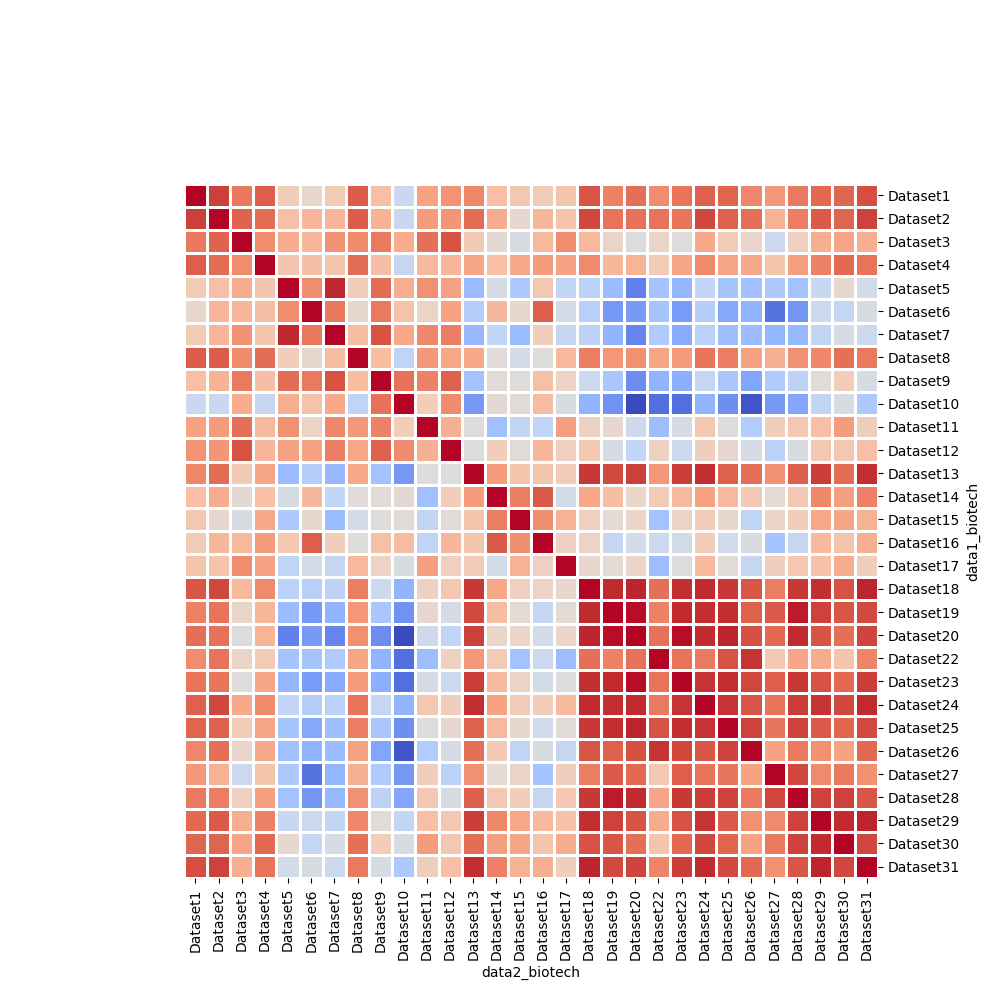

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

row_col_order = [f'Dataset{i+1}' for i in range(31)]
row_col_order.remove('Dataset21')


pd_df['data1_biotech'] = pd_df['data1_biotech'].astype('category')
pd_df['data2_biotech'] = pd_df['data2_biotech'].astype('category')


# 使用pivot_table方法来重新排列数据
table = pd.pivot_table(pd_df, values='NMI_r', index='data1', columns='data2')

table = table.reindex(row_col_order, axis=0)
table = table.reindex(row_col_order, axis=1)

# 设置行和列的颜色
# row_colors = sns.color_palette("Set2", len(pd_df['data1_biotech'].cat.categories))

# row_colors_map = dict(zip(row_col_order,row_colors))

# network_colors = [row_colors_map[r] for r in table.columns]



# 画出带有行和列颜色的热图
g = sns.clustermap(table, cmap='coolwarm', annot=False, 
                   fmt=".2f", linewidths=1,
                   cbar_kws={"shrink": .5}, row_cluster=False,col_cluster=False
                   # row_colors=network_colors, col_colors=network_colors
                  )

# 设置横纵坐标的标签和标题
g.ax_heatmap.set_xlabel('data2_biotech')
g.ax_heatmap.set_ylabel('data1_biotech')
# g.fig.suptitle('Heatmap of NMI between data1 and data2', y=1.05)
g.cax.set_visible(False)
# 显示热图
plt.show()

In [94]:
row_color_map

{'Visium': (0.4, 0.7607843137254902, 0.6470588235294118),
 'SMI': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'BaristaSeq': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'SeqFISH': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'MERFISH': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 'osmFISH': (1.0, 0.8509803921568627, 0.1843137254901961),
 'STARmap': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 'STARmap1k': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)}

In [99]:
row_color_map

{'Visium': (0.4, 0.7607843137254902, 0.6470588235294118),
 'SMI': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'BaristaSeq': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'SeqFISH': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'MERFISH': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 'osmFISH': (1.0, 0.8509803921568627, 0.1843137254901961),
 'STARmap': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 'STARmap1k': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)}

In [100]:
col_color_map

{'Visium': (0.4, 0.7607843137254902, 0.6470588235294118),
 'SMI': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'BaristaSeq': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'SeqFISH': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'MERFISH': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 'osmFISH': (1.0, 0.8509803921568627, 0.1843137254901961),
 'STARmap': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 'STARmap1k': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)}

In [36]:
row_colors = pd.DataFrame({'data1_biotech': pd_df['data1_biotech'].values}, index=pd_df['data1'])

/tmp/ipykernel_566/503310768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df['data1_biotech'] = pd_df['data1_biotech'].astype('category')
/tmp/ipykernel_566/503310768.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df['data2_biotech'] = pd_df['data2_biotech'].astype('category')


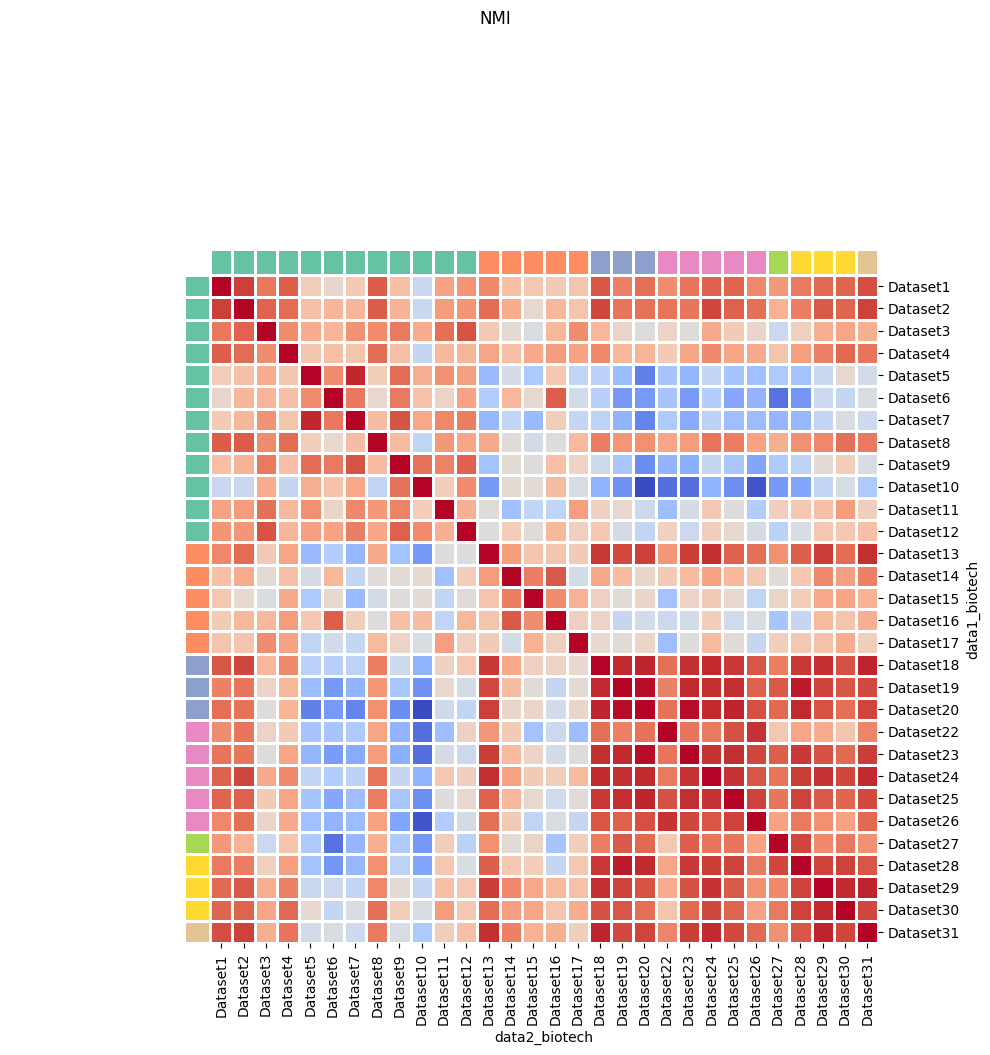

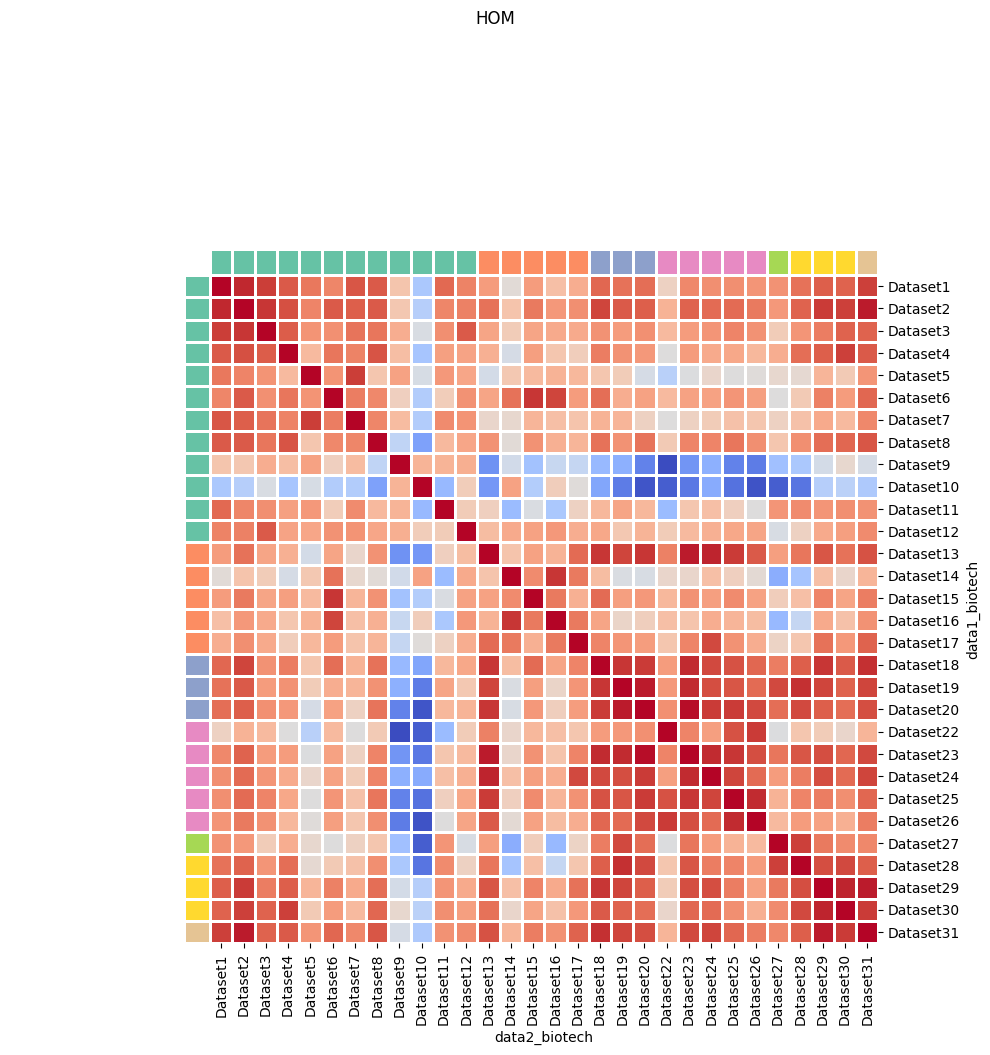

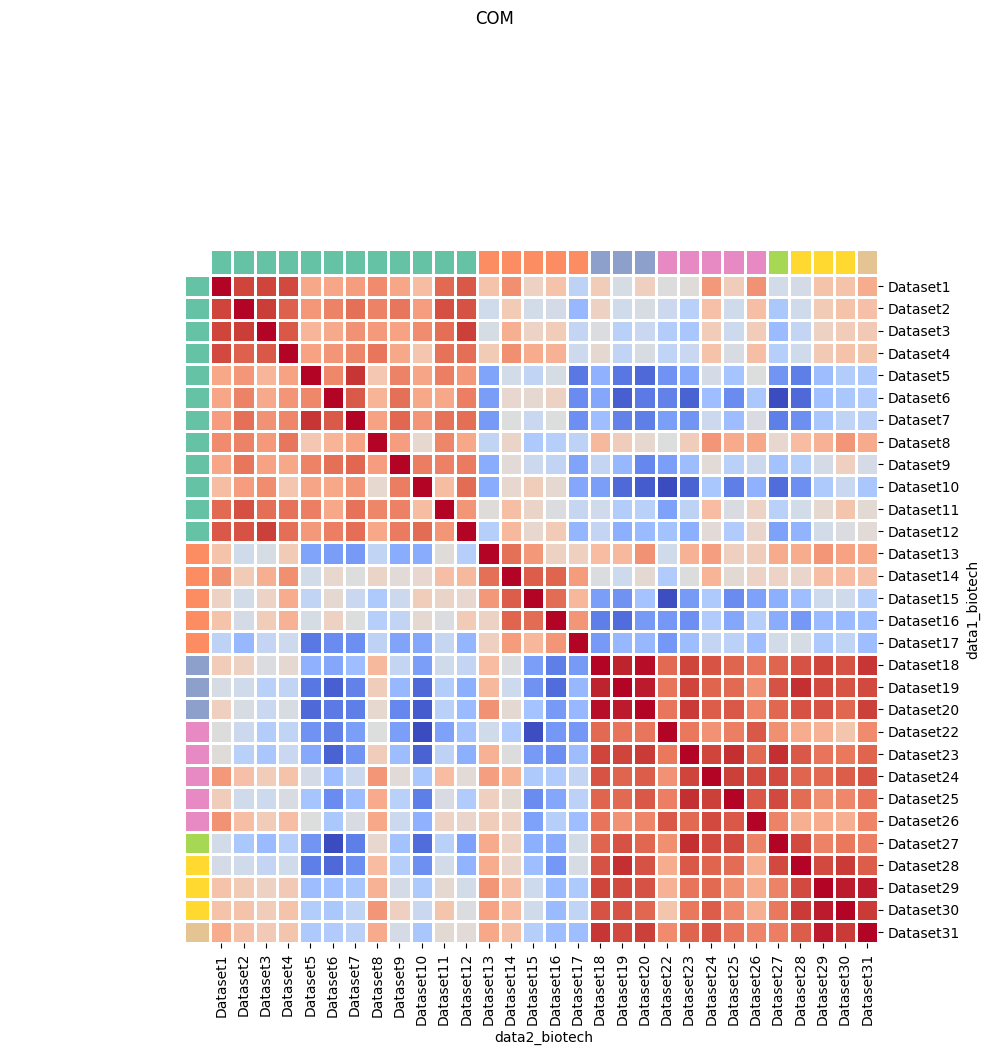

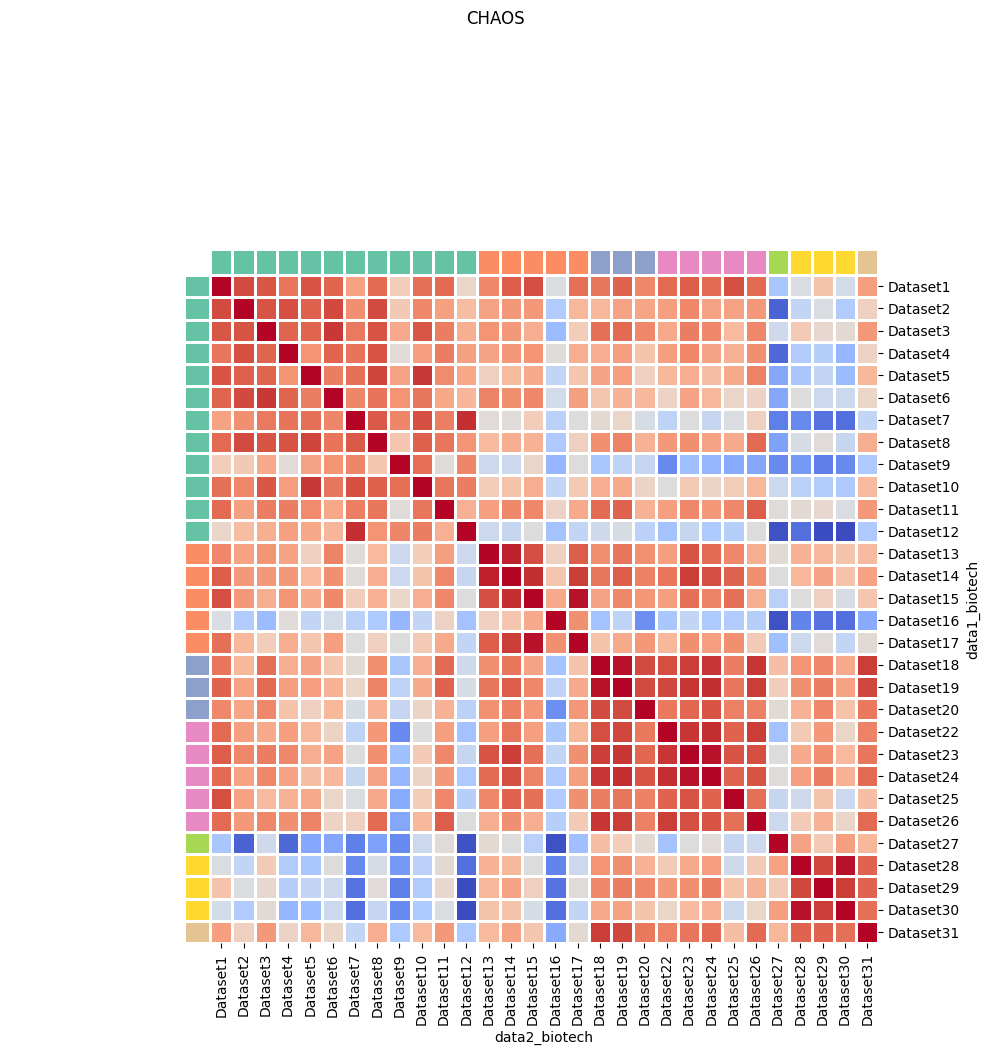

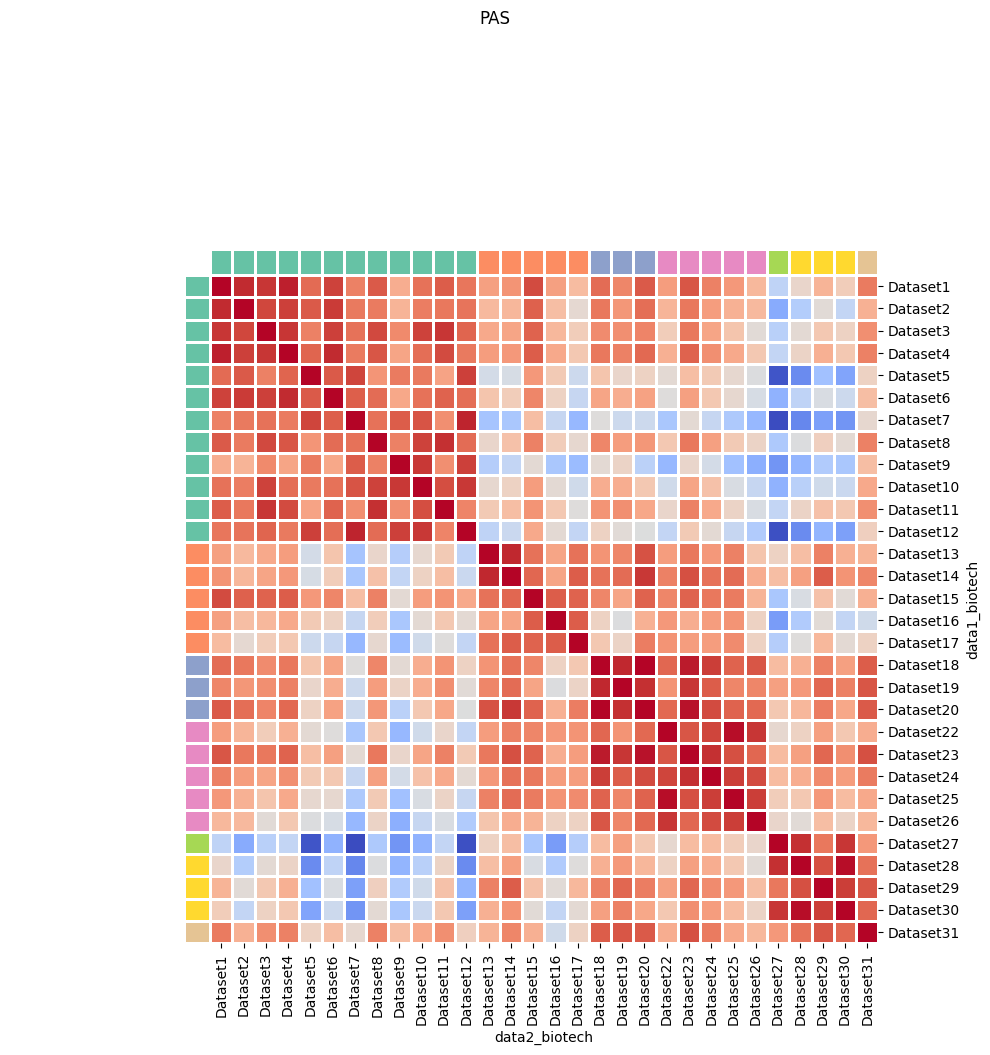

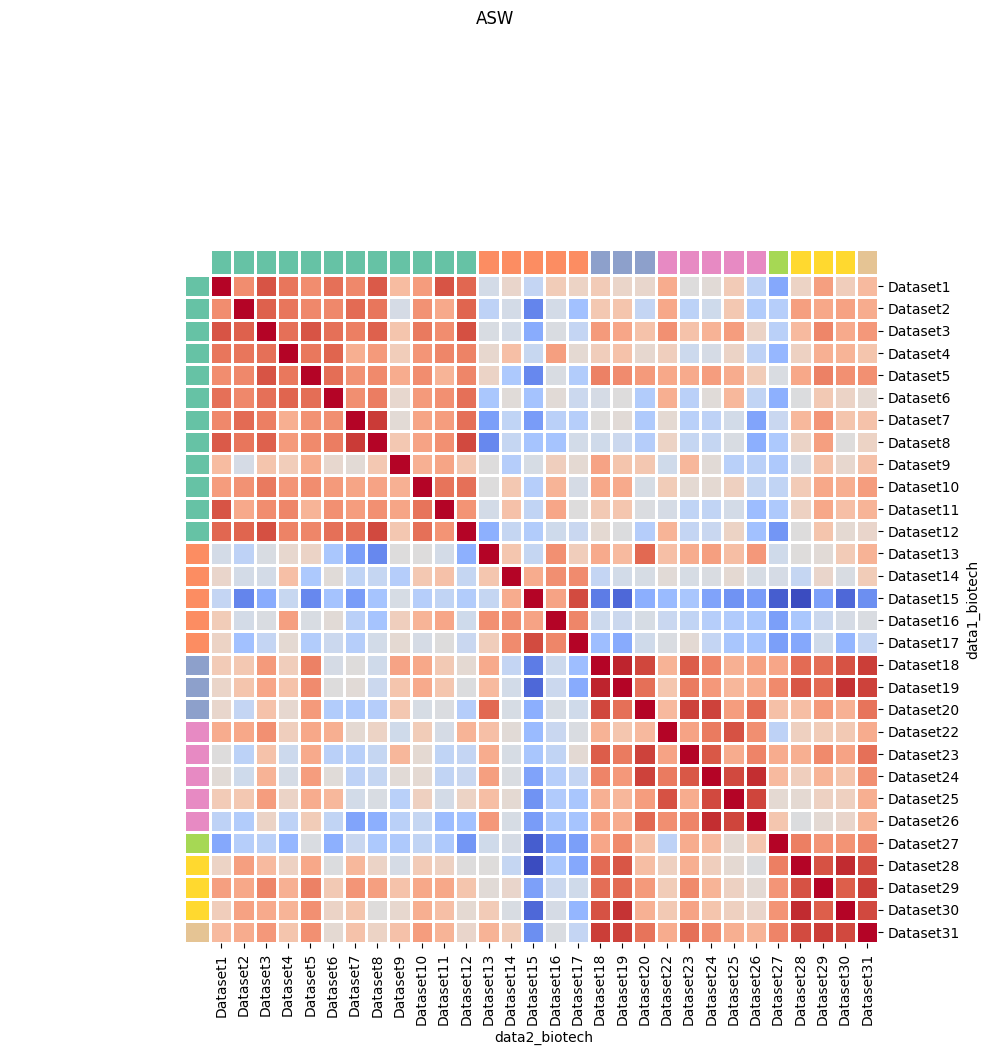

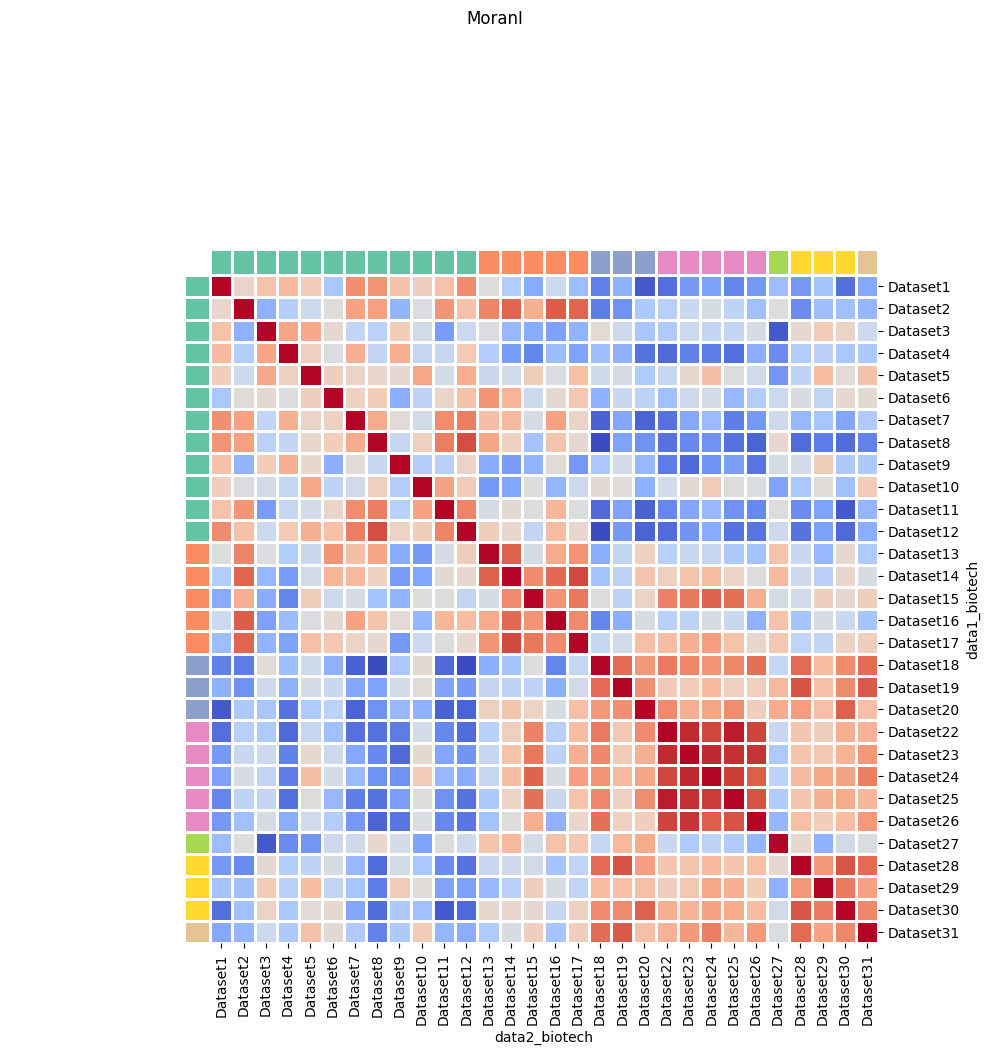

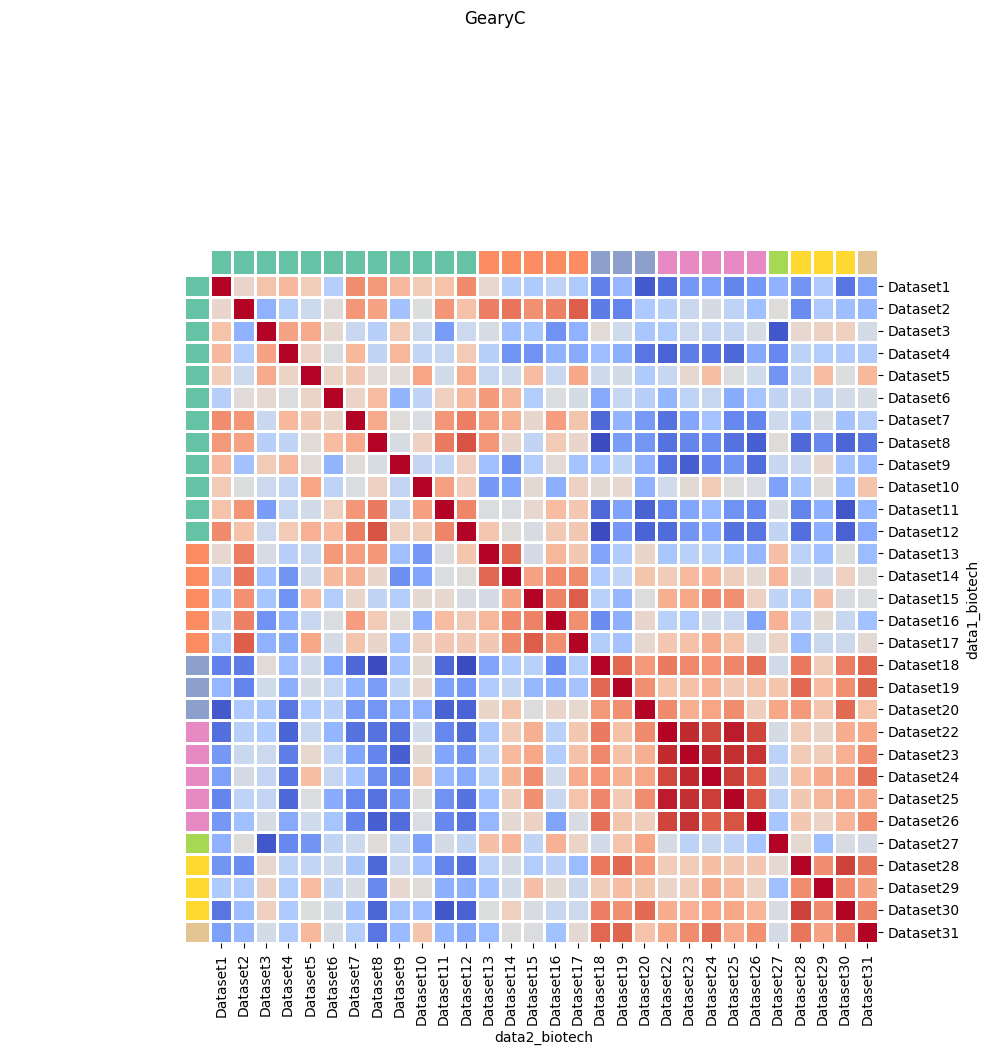

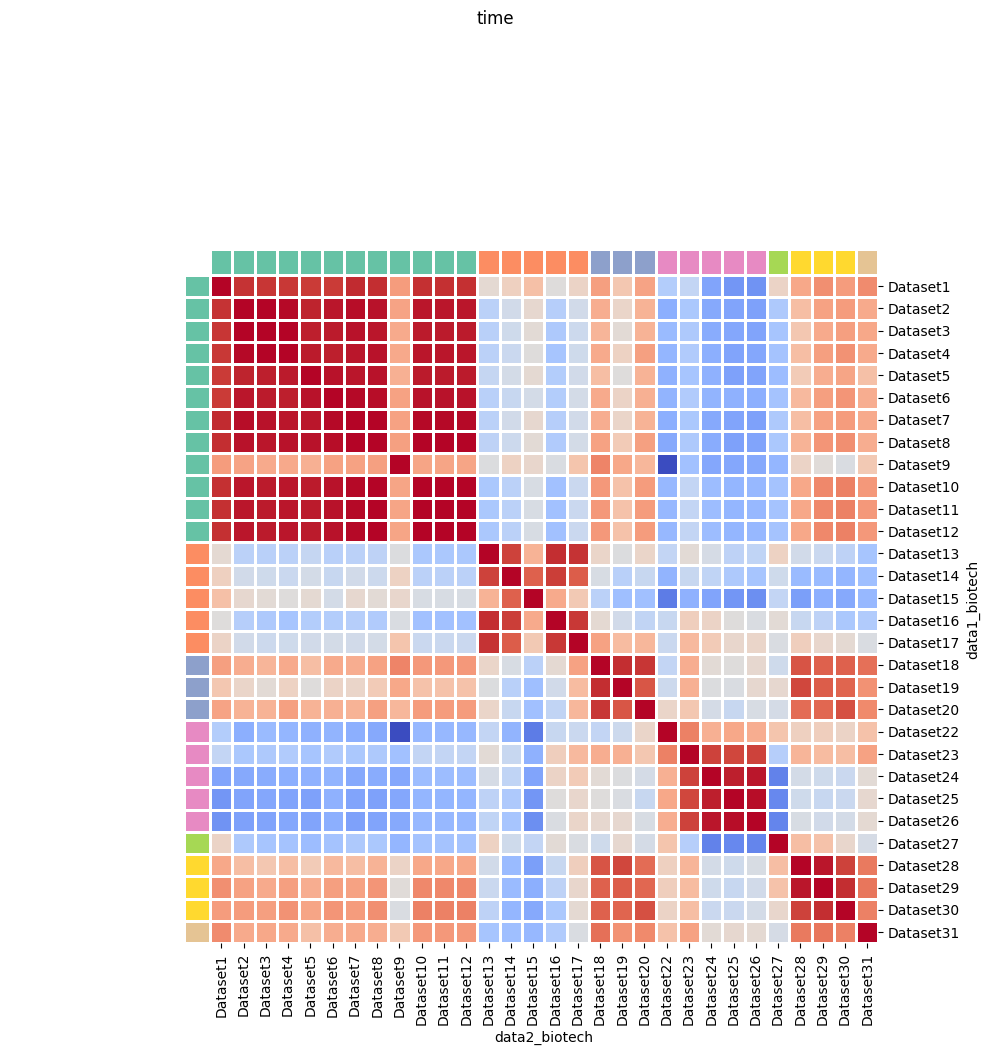

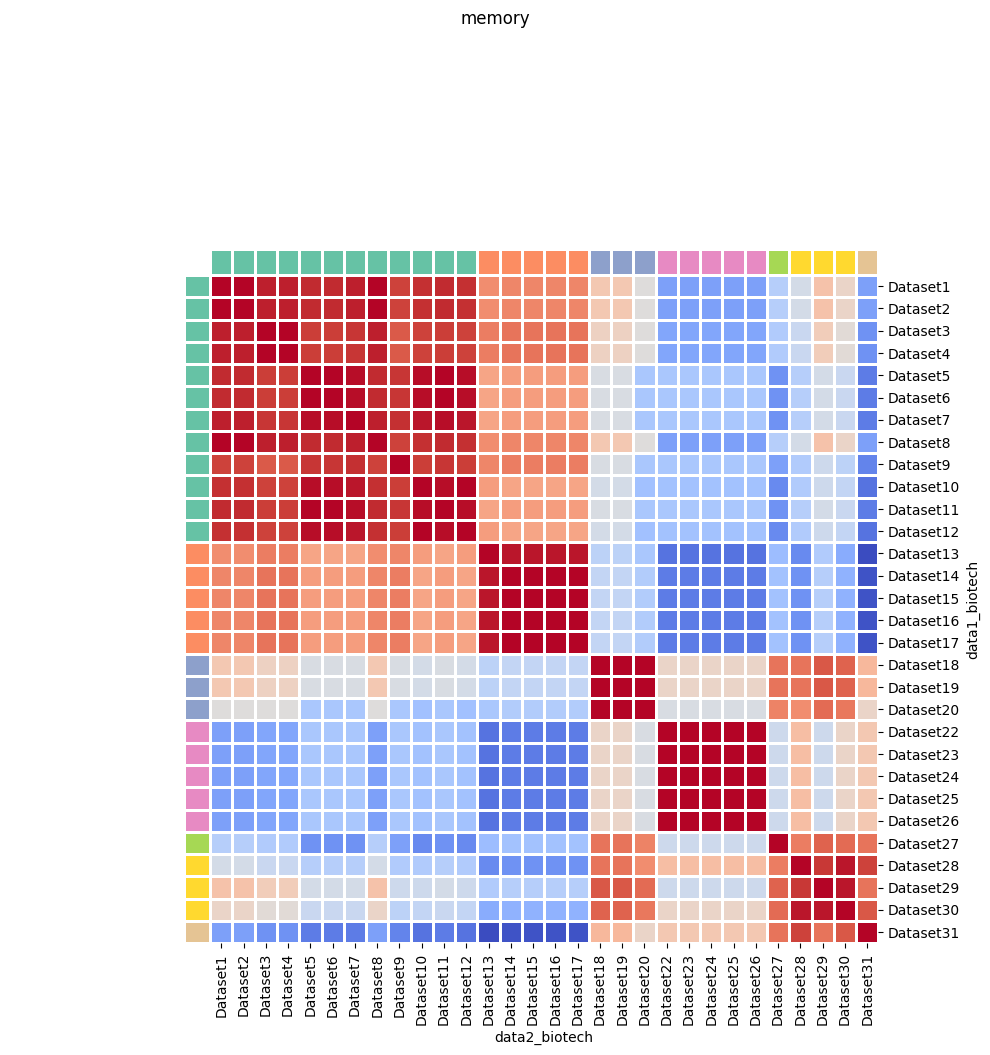

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

row_col_order = [f'Dataset{i+1}' for i in range(31)]
row_col_order.remove('Dataset21')
pd_df['data1_biotech'] = pd_df['data1_biotech'].astype('category')
pd_df['data2_biotech'] = pd_df['data2_biotech'].astype('category')

for m in metrics_list:

    # 使用pivot_table方法来重新排列数据
    table = pd.pivot_table(pd_df, values=f'{m}_r', index='data1', columns='data2')

    table = table.reindex(row_col_order, axis=0)
    table = table.reindex(row_col_order, axis=1)

    # 创建一个DataFrame对象来存储行和列的颜色信息
    # row_colors = pd.DataFrame({'data1_biotech': pd_df['data1_biotech'].values}, index=pd_df['data1'])
    # col_colors = pd.DataFrame({'data2_biotech': pd_df['data2_biotech'].values}, index=pd_df['data2'])

    # row_colors = pd_df_all['']
    row_colors = pd_df[['data1','data1_biotech']].set_index('data1')
    duplicated_indices = row_colors.index.duplicated()

    # drop the duplicated indices
    row_colors = row_colors[~duplicated_indices]
    row_colors = row_colors.reindex(row_col_order, axis=0)



    # 设置行和列的颜色
    palette = sns.color_palette("Set2", n_colors=len(pd_df['data1_biotech'].unique()))
    row_color_map = dict(zip(pd_df['data1_biotech'].unique(), palette))


    row_colors_cm = [row_color_map[r] for r in row_colors['data1_biotech']]
    col_colors_cm = [row_color_map[r] for r in row_colors['data1_biotech']]



    # 画出带有行和列颜色的热图
    g = sns.clustermap(table, cmap='coolwarm', annot=False, 
                       fmt=".2f", linewidths=1,
                       cbar_kws={"shrink": .5}, row_cluster=False,col_cluster=False,
                       row_colors=row_colors_cm, col_colors=col_colors_cm)

    # 设置横纵坐标的标签和标题
    g.ax_heatmap.set_xlabel('data2_biotech')
    g.ax_heatmap.set_ylabel('data1_biotech')
    g.fig.suptitle(f'{m}', y=1.05)
    g.cax.set_visible(False)
    # 显示热图
    # plt.show()
    plt.savefig(f'figures/similarity/data/{m}.pdf',bbox_inches='tight',transparent=True)
